##Exploratory Data Analysis on the MXM Data

In [1]:
import pylab
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
trainfile = './mxm_data/mxm_dataset_train.txt'
testfile = './mxm_data/mxm_dataset_test.txt'

In [3]:
#Header info is in the first 17 lines for the train file (and same for test file)
ftrain = open(trainfile, 'r')
ftest = open(testfile,'r')
print('Header Info for Training Set:')
for i in range(17):
    print(ftrain.readline())
#Header info is in the first 17 lines for the test file as well
print('Header Info for Testing Set:')
for i in range(17):
    print(ftest.readline())
    
#line 18 for each one is the top words
train_top_words = ftrain.readline()
test_top_words = ftest.readline()
print('First few words of train top words : ')
print(train_top_words[0:100])
print('Should be i,the,you,to...')

print('First few words of test top words : ')
print(test_top_words[0:100])
print('Should be i,the,you,to...')  

#subsequent lines in the test and train sets should be "normal lines" 
#as described by the header text.
#read those in!
test = ftest.readlines() #this will pick up where we left off and read the remaining lines
train = ftrain.readlines() 
print('There are ', len(train), ' songs in the train set')
print('There are ', len(test), ' songs in the test set')

#since we read in all of the data, we can now close the files
ftest.close()
ftrain.close()

Header Info for Training Set:
# TRAINING SET

# MusiXmatch dataset, the official lyrics dataset

# of the Million Song Dataset

#    file created on Tue Mar 29 04:28:44 2011

#    contact: T. Bertin-Mahieux (Columbia University)

#             tb2332@columbia.edu

#    also: http://labrosa.ee.columbia.edu/millionsong/musixmatch

#          http://www.musixmatch.com

# FORMAT:

#     #   - comment, to ignore

#     %   - list of top words, comma-separated

#         - normal line, contains track_id, mxm track id,

#           then word count for each of the top words, comma-separated

#           word count is in sparse format -> ...,<word idx>:<cnt>,...

#           <word idx> starts at 1 (not zero!)

# All our work is done using UTF-8 encoding.

# enjoy!

Header Info for Testing Set:
# TESTING SET

# MusiXmatch dataset, the official lyrics dataset

# of the Million Song Dataset

#    file created on Tue Mar 29 04:28:44 2011

#    contact: T. Bertin-Mahieux (Columbia University)

#    

In [4]:
#are train_top_words and test_top_words identical? you'd think they should be
is_true = (train_top_words == test_top_words)
print('Train Top Words == Test Top Words ? : ', is_true)

Train Top Words == Test Top Words ? :  True


In [5]:
#they are they same so let's just call one of them "top words" and use that from now on:
top_words = test_top_words

In [6]:
len(top_words) #this is the number of characters, let's try to split them into words

29173

In [7]:
#notice that the first word has a % character in front of it.
#remove that character:
top_words = top_words[1:]
print('First few words of top words : ')
print(train_top_words[0:100])
print('Should be i,the,you,to...')

First few words of top words : 
%i,the,you,to,and,a,me,it,not,in,my,is,of,your,that,do,on,are,we,am,will,all,for,no,be,have,love,so,
Should be i,the,you,to...


In [8]:
#split into individual words
train_top_words = train_top_words.split(',')
test_top_words = test_top_words.split(',')
top_words = top_words.split(',')
print('First 10 words: ', top_words[0:10])

First 10 words:  ['i', 'the', 'you', 'to', 'and', 'a', 'me', 'it', 'not', 'in']


In [9]:
print('Most Common 100 words: ', top_words[0:100])

Most Common 100 words:  ['i', 'the', 'you', 'to', 'and', 'a', 'me', 'it', 'not', 'in', 'my', 'is', 'of', 'your', 'that', 'do', 'on', 'are', 'we', 'am', 'will', 'all', 'for', 'no', 'be', 'have', 'love', 'so', 'know', 'this', 'but', 'with', 'what', 'just', 'when', 'like', 'now', 'que', 'time', 'can', 'come', 'de', 'there', 'go', 'up', 'oh', 'la', 'one', 'they', 'out', 'down', 'get', 'she', 'was', 'see', 'if', 'got', 'never', 'from', 'he', 'feel', 'want', 'let', 'make', 'way', 'say', 'take', 'would', 'as', 'ca', 'day', 'at', 'babi', 'away', 'life', 'yeah', 'y', 'back', 'by', 'her', 'heart', 'here', 'how', 'could', 'night', 'need', 'our', 'look', 'where', 'en', 'eye', 'thing', 'world', 'more', 'caus', 'gonna', 'die', 'right', 'been', 'tell']


> ^^ It's strange that the word "ca" is in there.

In [10]:
# have a look at some of the song data:
print('First train data song : ')
print(train[0])

First train data song : 
TRAAAAV128F421A322,4623710,1:6,2:4,3:2,4:2,5:5,6:3,7:1,8:1,11:1,12:2,13:3,14:1,15:1,18:2,19:2,20:2,21:2,23:4,25:1,26:2,28:1,30:1,36:2,42:1,45:1,54:2,56:1,57:1,68:1,99:1,192:2,249:1,264:1,356:1,389:1,561:1,639:1,656:1,687:1,761:1,773:1,804:1,869:2,914:1,1035:1,1156:1,1221:1,1287:1,1364:1,1407:1,1533:2,1857:1,2096:1,2117:1,2482:2,2548:1,2705:1,2723:1,2868:2,2992:2,3455:1,3717:1,3851:1,4322:1,4382:1,4613:1,4713:1,4906:1



In [11]:
## try to make a data frame with 3 columns out of the training data

id1=[]
id2=[]
counts=[]
for item in train:
    item = item.split(',')
    id1.append(item[0])
    id2.append(item[1])
    counts.append(item[2:])
assert(len(counts)==len(id1))

In [12]:
print('number songs in train set = ',len(counts))

number songs in train set =  210519


In [13]:
#make counts a list of dictionaries
counts_list = []
for song in counts:
    song_dict = {}
    keys_and_vals = song
    for entry in keys_and_vals:
        entry = entry.split(':')
        key = int(entry[0])
        val = int(entry[1])
        song_dict[key]=val
    counts_list.append(song_dict)

In [14]:
len(counts_list)

210519

In [15]:
# now put them in a data frame
d = {'Track ID':id1,'MXM Track ID':id2,'Counts':counts_list}
train_df = pd.DataFrame(data=d)

In [16]:
train_df.head(10)

,Counts,MXM Track ID,Track ID
0,"{1: 6, 2: 4, 3: 2, 4: 2, 5: 5, 6: 3, 7: 1, 8: ...",4623710,TRAAAAV128F421A322
1,"{256: 1, 1: 10, 130: 3, 3: 17, 4: 8, 5: 2, 6: ...",6477168,TRAAABD128F429CF47
2,"{1: 28, 2: 15, 3: 2, 4: 12, 5: 22, 6: 2, 7: 2,...",2516445,TRAAAED128E0783FAB
3,"{1: 5, 2: 4, 3: 3, 4: 2, 5: 1, 6: 11, 129: 17,...",3759847,TRAAAEF128F4273421
4,"{1: 4, 258: 1, 4: 5, 5: 7, 6: 2, 7: 4, 264: 1,...",3783760,TRAAAEW128F42930C0
5,"{1: 16, 2: 4, 299: 1, 4: 1, 5: 3, 6: 5, 7: 5, ...",6640025,TRAAAFD128F92F423A
6,"{4294: 1, 897: 1, 4502: 1, 164: 1, 1349: 1, 71...",5493388,TRAAAGF12903CEC202
7,"{384: 4, 1: 4, 2: 11, 3: 2, 4: 7, 5: 3, 6: 5, ...",5133845,TRAAAHJ128F931194C
8,"{1: 39, 2: 30, 3: 10, 4: 10, 5: 28, 6: 21, 7: ...",1619153,TRAAAHZ128E0799171
9,"{1: 6, 2: 9, 5: 3, 6: 4, 7: 4, 8: 3, 9: 5, 10:...",8525084,TRAAAJG128F9308A25


In [17]:
# count up all of the count dictionaries (make one big dictionary that
# should have all of the common words in it and their total counts)

from collections import defaultdict

def dsum(dicts):
    ret = defaultdict(int)
    for d in dicts:
        for k, v in d.items():
            ret[k] += v
    return dict(ret)

In [18]:
all_words_dict = dsum(counts_list)

In [19]:
len(all_words_dict)

5000

In [20]:
len(top_words)

5000

In [21]:
all_words_dict

{1: 1844508,
 2: 1647308,
 3: 1546262,
 4: 945583,
 5: 937448,
 6: 866766,
 7: 686972,
 8: 727134,
 9: 653495,
 10: 553193,
 11: 541806,
 12: 527787,
 13: 477290,
 14: 410091,
 15: 421119,
 16: 419401,
 17: 372796,
 18: 337762,
 19: 348192,
 20: 361595,
 21: 315503,
 22: 320954,
 23: 296223,
 24: 281814,
 25: 293203,
 26: 260164,
 27: 265594,
 28: 256000,
 29: 242559,
 30: 219669,
 31: 225673,
 32: 221075,
 33: 214175,
 34: 201045,
 35: 186516,
 36: 201608,
 37: 172168,
 38: 138477,
 39: 160490,
 40: 166836,
 41: 159895,
 42: 132082,
 43: 152318,
 44: 162787,
 45: 180890,
 46: 159699,
 47: 137362,
 48: 145930,
 49: 151448,
 50: 149311,
 51: 143560,
 52: 171585,
 53: 145605,
 54: 144571,
 55: 137803,
 56: 146166,
 57: 152116,
 58: 127173,
 59: 123506,
 60: 128014,
 61: 119041,
 62: 124886,
 63: 122998,
 64: 119918,
 65: 111580,
 66: 116959,
 67: 113952,
 68: 110888,
 69: 101344,
 70: 112346,
 71: 93740,
 72: 101207,
 73: 111755,
 74: 88240,
 75: 91477,
 76: 107892,
 77: 78615,
 78: 9722

In [22]:
# sort by frequency to get rank of each word
import operator
freqs = list(reversed(sorted(all_words_dict.values())))
print('highest 5 frequencies : ', freqs[0:5])
ranks = range(len(freqs))
#plt.plot(log(ranks),log(freqs))

highest 5 frequencies :  [1844508, 1647308, 1546262, 945583, 937448]


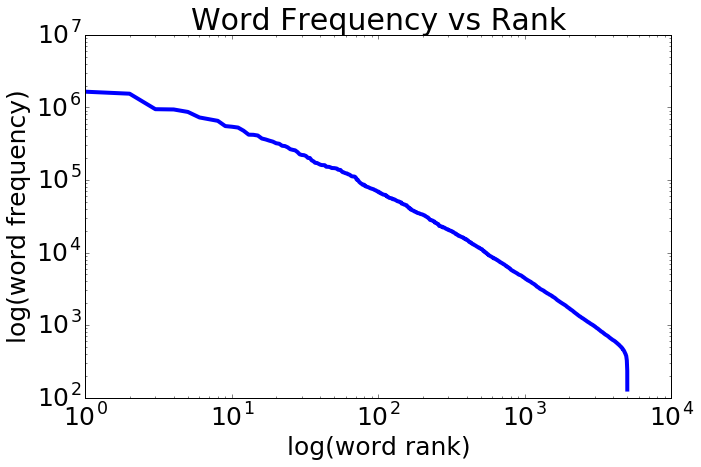

In [23]:

plt.loglog(ranks,freqs,lw=4)
plt.title('Word Frequency vs Rank')
plt.ylabel('log(word frequency)')
plt.xlabel('log(word rank)')
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.rcParams.update({'font.size': 25})

In [24]:
# map the all_words dict to their actual word, make word cloud?
# create a dict that maps an index to its word

word_idx = list(range(len(top_words)))
# add one to each index in the word index list since the words are 1-indexed according to the header text
word_idx = [x+1 for x in word_idx]
# test that the maximum key in the all words dictionary is the same as the final index in the word list
assert(word_idx[-1] == max(all_words_dict.keys()))
top_words_dict = dict(zip(word_idx,top_words))

In [25]:
top_words_dict

{1: 'i',
 2: 'the',
 3: 'you',
 4: 'to',
 5: 'and',
 6: 'a',
 7: 'me',
 8: 'it',
 9: 'not',
 10: 'in',
 11: 'my',
 12: 'is',
 13: 'of',
 14: 'your',
 15: 'that',
 16: 'do',
 17: 'on',
 18: 'are',
 19: 'we',
 20: 'am',
 21: 'will',
 22: 'all',
 23: 'for',
 24: 'no',
 25: 'be',
 26: 'have',
 27: 'love',
 28: 'so',
 29: 'know',
 30: 'this',
 31: 'but',
 32: 'with',
 33: 'what',
 34: 'just',
 35: 'when',
 36: 'like',
 37: 'now',
 38: 'que',
 39: 'time',
 40: 'can',
 41: 'come',
 42: 'de',
 43: 'there',
 44: 'go',
 45: 'up',
 46: 'oh',
 47: 'la',
 48: 'one',
 49: 'they',
 50: 'out',
 51: 'down',
 52: 'get',
 53: 'she',
 54: 'was',
 55: 'see',
 56: 'if',
 57: 'got',
 58: 'never',
 59: 'from',
 60: 'he',
 61: 'feel',
 62: 'want',
 63: 'let',
 64: 'make',
 65: 'way',
 66: 'say',
 67: 'take',
 68: 'would',
 69: 'as',
 70: 'ca',
 71: 'day',
 72: 'at',
 73: 'babi',
 74: 'away',
 75: 'life',
 76: 'yeah',
 77: 'y',
 78: 'back',
 79: 'by',
 80: 'her',
 81: 'heart',
 82: 'here',
 83: 'how',
 84: 'cou

In [32]:
# new dict "d" to be used for the word cloud 
# same as all_words, but the key is the actual word instead of the word index
ds = [top_words_dict, all_words_dict]
d = {}
for k,v in top_words_dict.items():
    d[v] = all_words_dict[k]

In [33]:
d['i']

1844508

In [34]:
all_words_dict[1]

1844508

In [35]:
#change d to tuples for input to wordcloud
word_tuples = [(k, v) for k, v in d.items()]
len(word_tuples)

5000

/Users/stephanie/anaconda3/lib/python3.4/site-packages/PIL/ImageDraw.py:99: UserWarning: setfont() is deprecated. Please set the attribute directly instead.
  "Please set the attribute directly instead.")


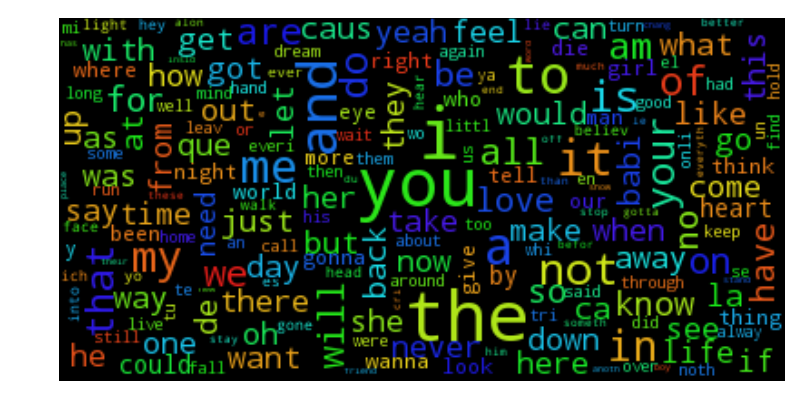

In [36]:
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5 \
                     , stopwords=STOPWORDS).generate_from_frequencies(word_tuples)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
fig = plt.gcf()
fig.set_size_inches(15.5, 6.5)

##TO DO
### Make a test data frame as well, and update the all_words dictionary to have both train and test
